In [1]:
import pandas as pd
import numpy as np

In [2]:
mush_data = pd.read_csv('training_mush.csv')
mush_data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
rf = RandomForestClassifier(random_state=0)

In [5]:
params = {"n_estimators": range(10, 51, 10), "max_depth": range(1, 13, 2), \
          "min_samples_leaf": range(1, 8), "min_samples_split": range(2, 10, 2)}

In [6]:
search = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=-1)

In [7]:
X = mush_data.drop(["class"], axis=1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,3,1
6089,3,2,2,0,2,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,0
6090,5,2,3,0,1,1,0,1,9,0,...,2,7,7,0,2,1,4,3,4,0
6091,3,2,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1


In [12]:
y = mush_data['class']
y

0       0
1       1
2       1
3       0
4       0
       ..
6088    0
6089    1
6090    1
6091    0
6092    1
Name: class, Length: 6093, dtype: int64

In [13]:
search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [20]:
search.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

In [15]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [27]:
importance_data = pd.DataFrame(search.best_estimator_.feature_importances_, index=X.columns, columns=["importance"])
importance_data.sort_values(by="importance", ascending=False)

,importance
odor,0.188376
gill-color,0.103861
stalk-root,0.103793
spore-print-color,0.083564
gill-spacing,0.080840
ring-type,0.070726
bruises,0.070109
gill-size,0.068461
stalk-surface-below-ring,0.048296
population,0.043783


In [28]:
X_test = pd.read_csv("testing_mush.csv")
X_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [29]:
prediction = search.predict(X_test)
prediction

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [32]:
prediction.sum()

976

In [33]:
from sklearn.metrics import confusion_matrix

In [41]:
y_true = pd.read_csv("testing_y_mush.csv")

In [42]:
y_true

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


In [45]:
confusion_matrix(y_true=y_true, y_pred=prediction)

array([[1055,    0],
       [   0,  976]], dtype=int64)

In [46]:
import seaborn as sns

<AxesSubplot:>

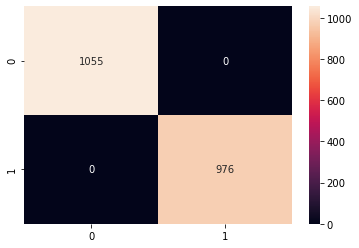

In [49]:
sns.heatmap(confusion_matrix(y_true=y_true, y_pred=prediction), annot=True, fmt='g')